In [ ]:
import pandas as pd
df = pd.read_csv("train.csv")

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

category     0
text         0
cleanText    0
dtype: int64

In [ ]:
df.dropna()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df['length'] = df['cleanText'].str.split().apply(len)
df.head(20)

In [ ]:
df.length.describe()

In [ ]:
import string 
def remove_punc(s):
    table = str.maketrans({key: None for key in string.punctuation})
    return s.translate(table)

In [ ]:
x = df['cleanText'].fillna(' ')
y = df['category']
print(x.head())
print(y.head())

In [ ]:
x = df['cleanText'].apply(remove_punc)
x.shape

(35667,)

In [ ]:
contractions = { 
"বি.দ্র ": "বিশেষ দ্রষ্টব্য",
"ড.": "ডক্টর",
"ডা.": "ডাক্তার",
"ইঞ্জি:": "ইঞ্জিনিয়ার",
"রেজি:": "রেজিস্ট্রেশন",
"মি.": "মিস্টার",
"মু.": "মুহাম্মদ",
"মো.": "মোহাম্মদ",
}

In [ ]:
import re
import string
from collections import Counter
vocab = Counter()
def clean_text(x,remove_stopwords = False):
    if True:
        new_text = []
        for word in x:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        x = "".join(new_text)
    # Format words and remove unwanted characters
    whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)
    bangla_digits = u"[\u09E6\u09E7\u09E8\u09E9\u09EA\u09EB\u09EC\u09ED\u09EE\u09EF]+"
    english_chars = u"[a-zA-Z0-9]"
    punc = u"[(),$%^&*+={}\[\]:\"|\'\~`<>/,¦!?½£¶¼©⅐⅑⅒⅓⅔⅕⅖⅗⅘⅙⅚⅛⅜⅝⅞⅟↉¤¿º;-]+"
    bangla_fullstop = u"\u0964"     #bangla fullstop(dari)
    punctSeq   = u"['\"“”‘’]+|[.?!,…]+|[:;]+"
    
    x = re.sub(bangla_digits, " ", x)
    x = re.sub(punc, " ", x)
    x = re.sub(english_chars, " ", x)
    x = re.sub(bangla_fullstop, " ", x)
    x = re.sub(punctSeq, " ", x)
    x = whitespace.sub(" ", x).strip()
    
    x = re.sub(r'https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE)
    x = re.sub(r'\<a href', ' ', x)
    x = re.sub(r'&amp;‘:‘ ’', '', x) 
    x = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]। ,', ' ', x)
    x = re.sub(r'<br />', ' ', x)
    x = re.sub(r'\'', ' ', x)
    x = re.sub(r"[\@$#%~+-\.\'।\"]"," ",x)
    x = re.sub(r"(?m)^\s+", "", x)
    x = re.sub("[()]","",x)
    x = re.sub("[‘’]","",x)
    x = re.sub("[!]","",x)
    x = re.sub("[/]","",x)
    x = re.sub("[:]","",x)
    x = re.sub('\ |\?|\.|\!|\/|\;|\:', ' ',x)
    x = x.strip("/")
    
    if remove_stopwords:
        k = []
        with open('/content/Banglastopword.txt', 'r',encoding="utf-8") as f:
            for word in f:
                word = word.split()
                k.append(word[0])
            x = [t for t in x if t not in k]
            x = "".join(x)
   

    return x

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
%matplotlib inline

In [ ]:
vocab = CountVectorizer(analyzer=clean_text,encoding='utf-8').fit(x)

In [ ]:
print(len(vocab.vocabulary_))

153


In [ ]:
r0 = x[81]
print(r0)

In [ ]:
vocab0 = vocab.transform([r0])
print(vocab0)

In [ ]:
print(vocab.get_feature_names()[50])
print(vocab.get_feature_names()[50])

In [ ]:
x = vocab.transform(x)

In [ ]:
print("Shape of the sparse matrix: ", x.shape)
print("Non-Zero occurences: ",x.nnz)
density = (x.nnz/(x.shape[0]*x.shape[1]))*100
print("Density of the matrix = ",density)

Shape of the sparse matrix:  (35667, 153)
Non-Zero occurences:  1692914
Density of the matrix =  31.022506478315854


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=101)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print("Classification Report:",classification_report(y_test,predmnb))

mat= plot_confusion_matrix(mnb, x_test, y_test)
mat.ax_.set_title('confusion matrix', color='white')
plt.xlabel('Pricted Label', color= 'white')
plt.ylabel('True Label', color= 'white')
plt.gcf().axes[0].tick_params(colors= 'white')
plt.gcf().axes[1].tick_params(colors= 'white')
plt.gcf().set_size_inches(10,6)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(x_train,y_train)
predrmfr = rmfr.predict(x_test)
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:",classification_report(y_test,predrmfr))

In [ ]:
acc1=metrics.accuracy_score(y_test, predmnb)
print("Accuracy:",acc1*100,"%")

Accuracy: 56.36389122511915 %


In [ ]:
acc2=metrics.accuracy_score(y_test,predrmfr)
print("Accuracy:",acc2*100,"%")

mat= plot_confusion_matrix(rmfr, x_test, y_test)
mat.ax_.set_title('confusion matrix', color='white')
plt.xlabel('Pricted Label', color= 'white')
plt.ylabel('True Label', color= 'white')
plt.gcf().axes[0].tick_params(colors= 'white')
plt.gcf().axes[1].tick_params(colors= 'white')
plt.gcf().set_size_inches(10,6)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))
print("Score:",round(accuracy_score(y_test,preddt)*100,2))
print("Classification Report:",classification_report(y_test,preddt))

In [ ]:
acc3=metrics.accuracy_score(y_test,preddt)
print("Accuracy:",acc3*100,"%")

mat= plot_confusion_matrix(dt, x_test, y_test)
mat.ax_.set_title('confusion matrix', color='white')
plt.xlabel('Pricted Label', color= 'white')
plt.ylabel('True Label', color= 'white')
plt.gcf().axes[0].tick_params(colors= 'white')
plt.gcf().axes[1].tick_params(colors= 'white')
plt.gcf().set_size_inches(10,6)

In [ ]:
from sklearn.svm import SVC
svm = SVC(random_state=101)
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(y_test,predsvm))
print("Score:",round(accuracy_score(y_test,predsvm)*100,2))
print("Classification Report:",classification_report(y_test,predsvm))

Confusion Matrix for Support Vector Machines:
[[584  78  40  77  55 108  46]
 [ 71 641  34  52   6  80  44]
 [ 45  75 768  83  66  92  35]
 [ 65  49  87 732  40  94  38]
 [ 29  35  56  47 905  17  23]
 [ 81  96  72 112  19 707   5]
 [ 99  67  28  98  62  13 378]]
Score: 66.09
Classification Report:                precision    recall  f1-score   support

      economy       0.60      0.59      0.60       988
    education       0.62      0.69      0.65       928
entertainment       0.71      0.66      0.68      1164
international       0.61      0.66      0.63      1105
       sports       0.78      0.81      0.80      1112
        state       0.64      0.65      0.64      1092
   technology       0.66      0.51      0.58       745

     accuracy                           0.66      7134
    macro avg       0.66      0.65      0.65      7134
 weighted avg       0.66      0.66      0.66      7134



Accuracy: 66.0919540229885 %


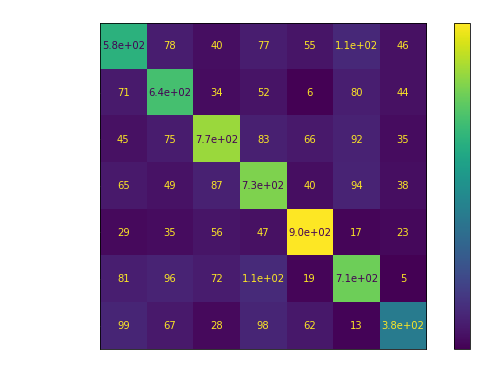

In [ ]:
import pickle

acc4=metrics.accuracy_score(y_test,predsvm)
print("Accuracy:",acc4*100,"%")

mat= plot_confusion_matrix(svm, x_test, y_test)
mat.ax_.set_title('confusion matrix', color='white')
plt.xlabel('Pricted Label', color= 'white')
plt.ylabel('True Label', color= 'white')
plt.gcf().axes[0].tick_params(colors= 'white')
plt.gcf().axes[1].tick_params(colors= 'white')
plt.gcf().set_size_inches(10,6)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print("Confusion Matrix for K Neighbors Classifier:")
print(confusion_matrix(y_test,predknn))
print("Score: ",round(accuracy_score(y_test,predknn)*100,2))
print("Classification Report:")
print(classification_report(y_test,predknn))

Confusion Matrix for K Neighbors Classifier:
[[594  90  45  80  40  86  53]
 [179 569  53  38   7  52  30]
 [135  62 701  85  89  76  16]
 [187  90 143 511  45  96  33]
 [ 63  32  95  59 827  18  18]
 [205 136  92 123  21 507   8]
 [175  89  57  94  59  17 254]]
Score:  55.55
Classification Report:
               precision    recall  f1-score   support

      economy       0.39      0.60      0.47       988
    education       0.53      0.61      0.57       928
entertainment       0.59      0.60      0.60      1164
international       0.52      0.46      0.49      1105
       sports       0.76      0.74      0.75      1112
        state       0.60      0.46      0.52      1092
   technology       0.62      0.34      0.44       745

     accuracy                           0.56      7134
    macro avg       0.57      0.55      0.55      7134
 weighted avg       0.57      0.56      0.56      7134



Accuracy: 55.550883095037854 %


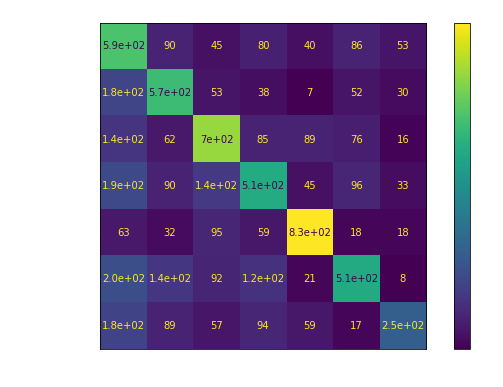

In [ ]:
acc5=metrics.accuracy_score(y_test,predknn)
print("Accuracy:",acc5*100,"%")

mat= plot_confusion_matrix(knn, x_test, y_test)
mat.ax_.set_title('confusion matrix', color='white')
plt.xlabel('Pricted Label', color= 'white')
plt.ylabel('True Label', color= 'white')
plt.gcf().axes[0].tick_params(colors= 'white')
plt.gcf().axes[1].tick_params(colors= 'white')
plt.gcf().set_size_inches(10,6)

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
predxgb = xgb.predict(x_test)
print("Confusion Matrix for xgboost Classifier:")
print(confusion_matrix(y_test,predxgb))
print("Score: ",round(accuracy_score(y_test,predxgb)*100,2))
print("Classification Report:")
print(classification_report(y_test,predxgb))

Confusion Matrix for xgboost Classifier:
[[583  49  53  81  53 106  63]
 [ 67 611  33  78  15  83  41]
 [ 55  41 679 105 127 119  38]
 [ 75  33  76 713  50 118  40]
 [ 33  13  63  48 883  32  40]
 [ 94 103  57 148  29 649  12]
 [ 98  49  24  91  93  15 375]]
Score:  62.98
Classification Report:
               precision    recall  f1-score   support

      economy       0.58      0.59      0.59       988
    education       0.68      0.66      0.67       928
entertainment       0.69      0.58      0.63      1164
international       0.56      0.65      0.60      1105
       sports       0.71      0.79      0.75      1112
        state       0.58      0.59      0.59      1092
   technology       0.62      0.50      0.55       745

     accuracy                           0.63      7134
    macro avg       0.63      0.62      0.63      7134
 weighted avg       0.63      0.63      0.63      7134



Accuracy: 62.980095318194564 %


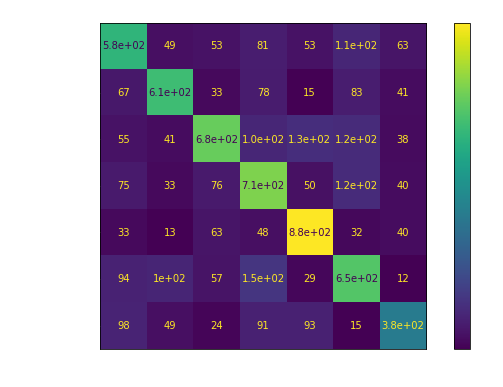

In [ ]:
acc6=metrics.accuracy_score(y_test,predxgb)
print("Accuracy:",acc6*100,"%")

mat= plot_confusion_matrix(xgb, x_test, y_test)
mat.ax_.set_title('confusion matrix', color='white')
plt.xlabel('Pricted Label', color= 'white')
plt.ylabel('True Label', color= 'white')
plt.gcf().axes[0].tick_params(colors= 'white')
plt.gcf().axes[1].tick_params(colors= 'white')
plt.gcf().set_size_inches(10,6)

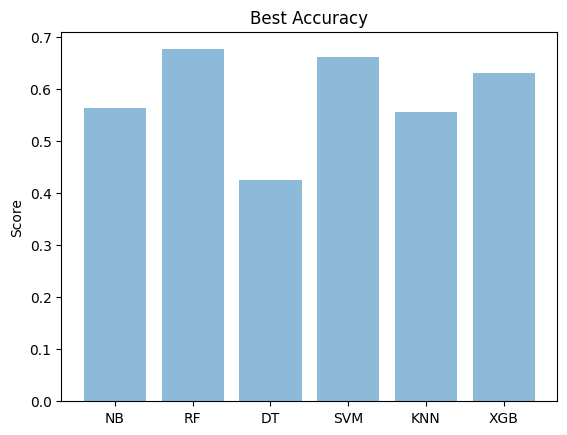

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('NB','RF','DT','SVM','KNN','XGB')
y_pos = np.arange(len(objects))
performance = [acc1,acc2,acc3,acc4,acc5,acc6]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('Best Accuracy')

plt.show()